In [645]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [646]:
movie = pd.read_csv('movie.csv')

In [647]:
#movie = movie.sort_values(by = ['ROI'], ascending=False)

In [648]:
movie.ndim

2

In [649]:
len(movie)

4916

In [650]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [651]:
movie.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

movie.describe(percentiles= [.3, .6, .9])

In [652]:
movie.columns 

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [653]:
movie.min()

num_critic_for_reviews          1.00
duration                        7.00
director_facebook_likes         0.00
actor_3_facebook_likes          0.00
actor_1_facebook_likes          0.00
gross                         162.00
num_voted_users                 5.00
cast_total_facebook_likes       0.00
facenumber_in_poster            0.00
num_user_for_reviews            1.00
budget                        218.00
title_year                   1916.00
actor_2_facebook_likes          0.00
imdb_score                      1.60
aspect_ratio                    1.18
movie_facebook_likes            0.00
dtype: float64

In [654]:
movie['genres']

0                         Action|Adventure|Fantasy|Sci-Fi
1                                Action|Adventure|Fantasy
2                               Action|Adventure|Thriller
3                                         Action|Thriller
4                                             Documentary
5                                 Action|Adventure|Sci-Fi
6                                Action|Adventure|Romance
7       Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                                 Action|Adventure|Sci-Fi
9                        Adventure|Family|Fantasy|Mystery
10                                Action|Adventure|Sci-Fi
11                                Action|Adventure|Sci-Fi
12                                       Action|Adventure
13                               Action|Adventure|Fantasy
14                               Action|Adventure|Western
15                        Action|Adventure|Fantasy|Sci-Fi
16                        Action|Adventure|Family|Fantasy
17            

In [673]:
movie = movie.dropna()

In [682]:
movie.shape

(3655, 28)

## Count for Genres 

In [674]:
genres_per_id = movie.genres.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [675]:
genres_per_id.head()

,Action,Fantasy,Adventure,Sci-Fi,Thriller,Romance,Musical,Animation,Family,Comedy,...,Drama,History,Sport,Crime,Horror,War,Biography,Music,Documentary,Film-Noir
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [676]:
genre_count = genres_per_id.sum(axis = 0)

In [677]:
genres_per_id.head()

,Action,Fantasy,Adventure,Sci-Fi,Thriller,Romance,Musical,Animation,Family,Comedy,...,Drama,History,Sport,Crime,Horror,War,Biography,Music,Documentary,Film-Noir
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [678]:
genre_count_df = pd.DataFrame(genre_count, columns=[ 'count'])
genre_count_df['genre'] = genre_count_df.index # Make new column with genre data
genres = list(genre_count_df.genre)
genre_count_df

,count,genre
Action,924.0,Action
Fantasy,486.0,Fantasy
Adventure,752.0,Adventure
Sci-Fi,478.0,Sci-Fi
Thriller,1074.0,Thriller
Romance,839.0,Romance
Musical,95.0,Musical
Animation,194.0,Animation
Family,431.0,Family
Comedy,1442.0,Comedy


Text(0.5, 1.0, 'The number of occurance of each genre in data')

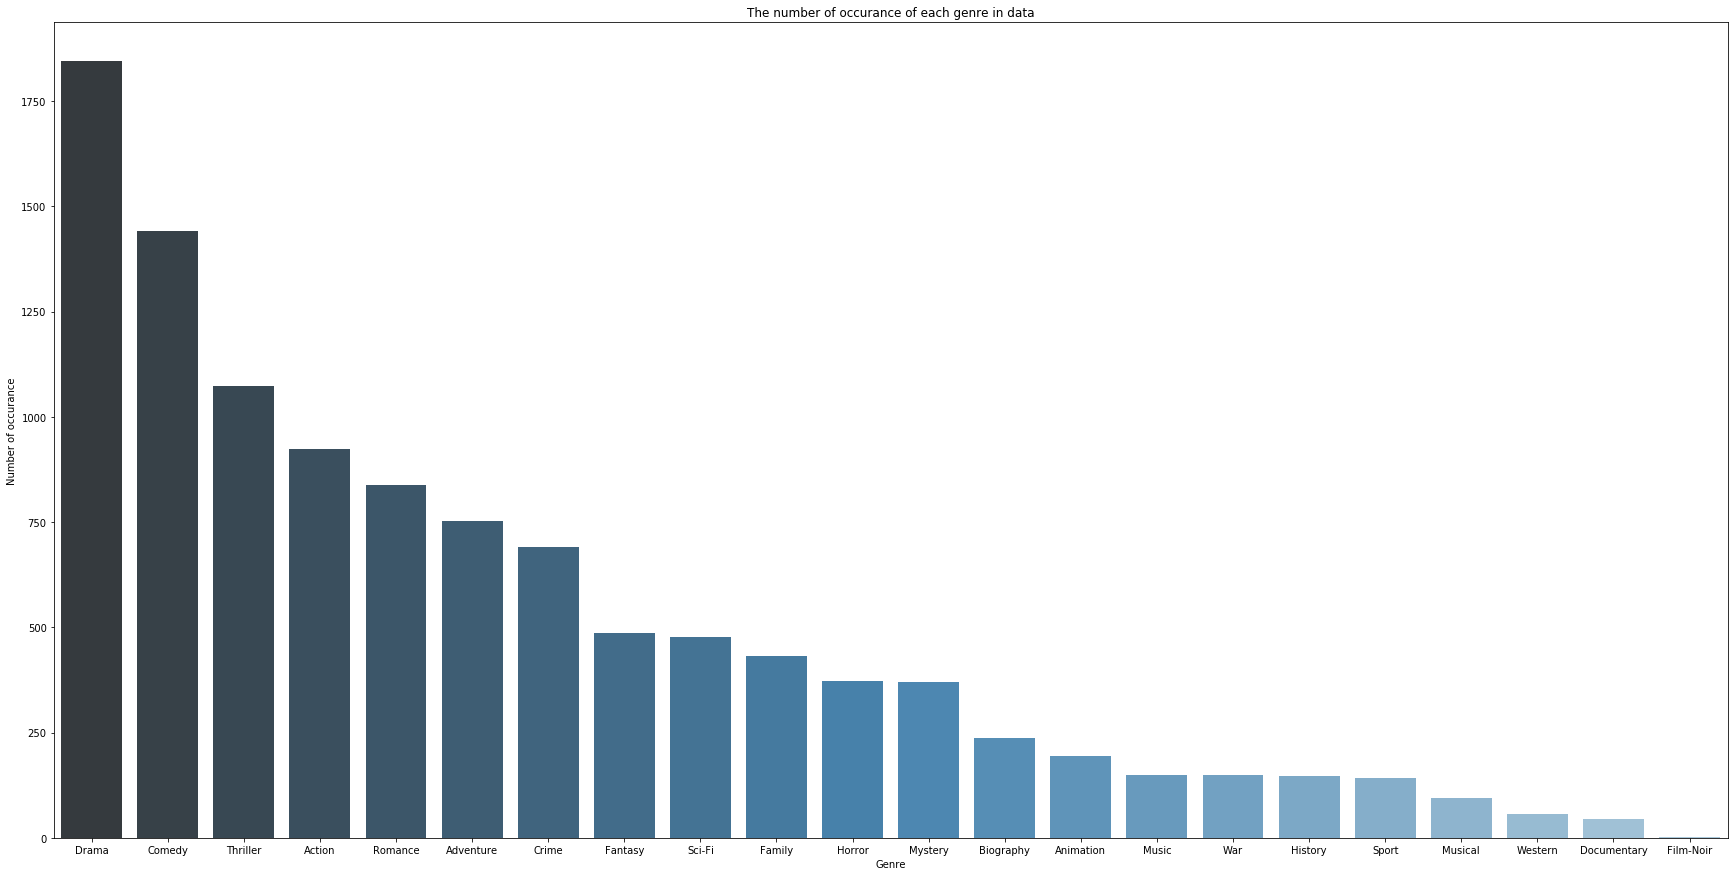

In [679]:
plt.figure(figsize=[30,15])
sns.barplot(data=genre_count_df.sort_values(by='count', ascending=False), x='genre', y='count', palette="Blues_d")
plt.xlabel('Genre')
plt.ylabel('Number of occurance')
plt.title('The number of occurance of each genre in data')

In [680]:
genre_list = list(genre_count_df.genre)

In [683]:
genre_revenue_ma = np.matrix(movie.gross) * np.matrix(genres_per_id)

genre_revenue_list = genre_revenue_ma.tolist()[0]

In [684]:
genre_revenue = pd.DataFrame(
    {'genre': genres,
        'revenue': genre_revenue_list})

## Calculate Revenue of Each Genre


Text(0.5, 1.0, 'The Revenue of each genre in TMDB data')

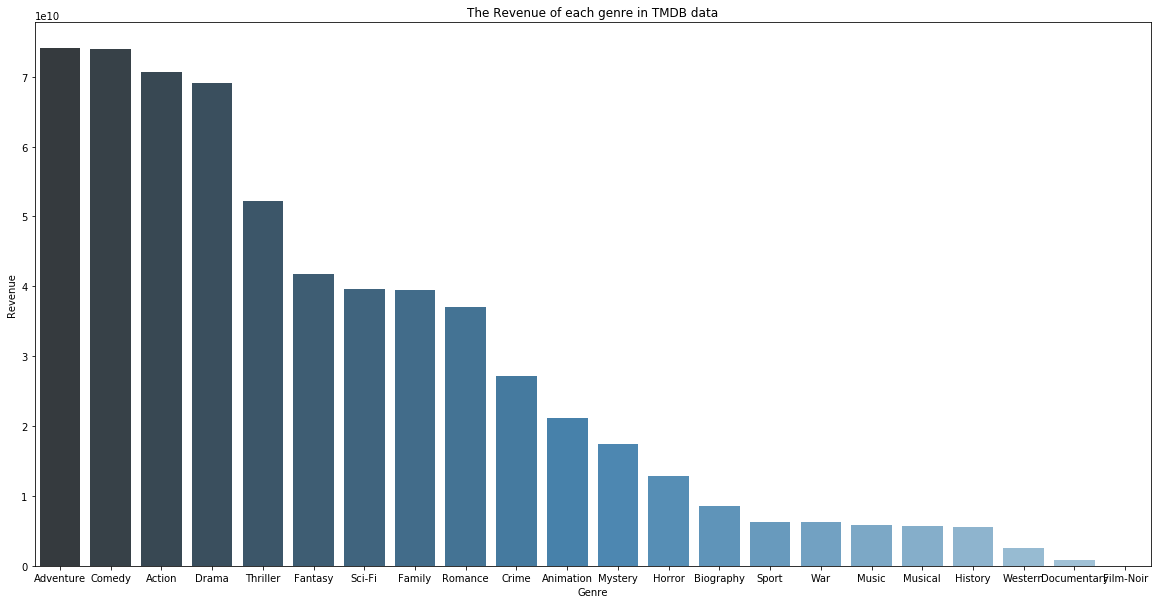

In [686]:
plt.figure(figsize=[20,10])
sns.barplot(data=genre_revenue.sort_values(by='revenue', ascending=False), x='genre', y='revenue',palette="Blues_d")
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('The Revenue of each genre in TMDB data')

## See if there is a correlation between actors in movies and popularity/revenue

## Calculate ROI

In [688]:
genre_budget_ma = np.matrix(movie.budget) * np.matrix(genres_per_id)

In [689]:
genre_roi_list = ((genre_revenue_ma / genre_budget_ma)*100).tolist()[0]

genre_roi = pd.DataFrame(
    {'genre': genres,
        'ROI': genre_roi_list})

Text(0.5, 1.0, 'The Overall ROI of each genre in TMDB data')

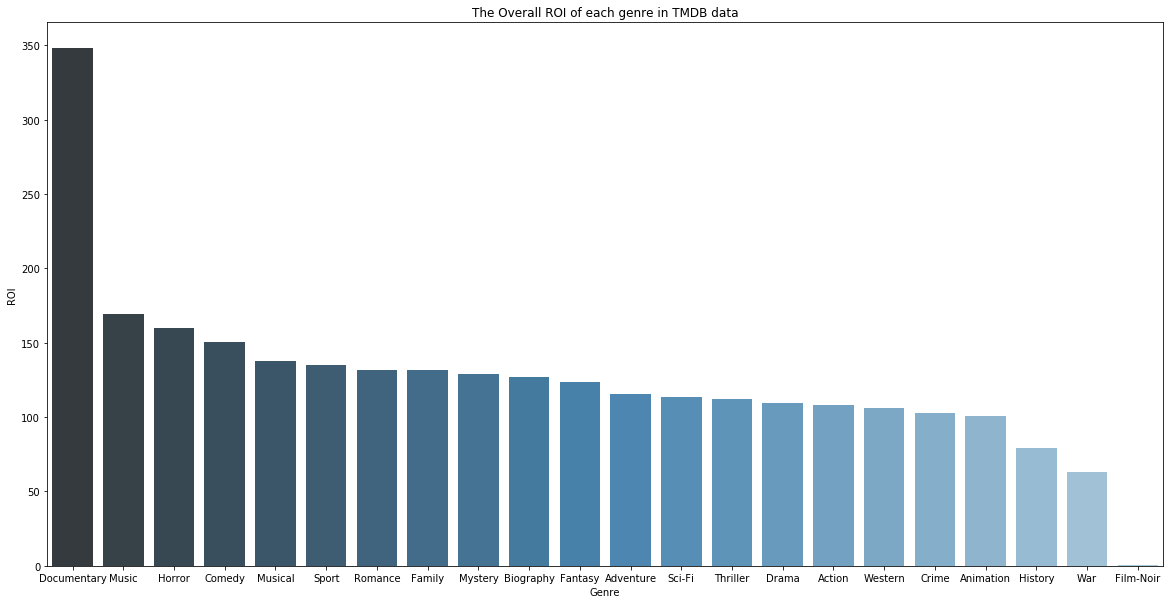

In [691]:
plt.figure(figsize=[20,10])
sns.barplot(data=genre_roi.sort_values(by='ROI', ascending=False), x='genre', y='ROI',palette="Blues_d")
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.title('The Overall ROI of each genre in TMDB data')

## Add ROI column 

In [697]:
movie['ROI'] = ((movie['gross'] / movie['budget']) * 100)  
movie.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ROI
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,320.888543


In [693]:
#genre_list 

In [698]:
genre_dfs = []
for genre in genre_list:
    genre_dfs.append(movie.loc[movie['genres'] == genre])
    
    

In [699]:
item_dfs = []
for item in genre_dfs:
    item = item.sort_values(by = ['ROI'], ascending=False)
    item_dfs.append(item)

In [700]:
genre_list

['Action',
 'Fantasy',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Romance',
 'Musical',
 'Animation',
 'Family',
 'Comedy',
 'Mystery',
 'Western',
 'Drama',
 'History',
 'Sport',
 'Crime',
 'Horror',
 'War',
 'Biography',
 'Music',
 'Documentary',
 'Film-Noir']

In [264]:
action_df = item_dfs[0]
adventure_df = item_dfs[1]
animation_df = item_dfs[2]
biography_df = item_dfs[3]
comedy_df = item_dfs[4]
crime_df = item_dfs[5]
documentary_df = item_dfs[6]
drama_df = item_dfs[7]
family_df = item_dfs[8]
fantasy_df = item_dfs[9]
horror_df = genre_dfs[10]
musical_df = item_dfs[11]
mystery_df = item_dfs[12]
romance_df = item_dfs[13]
sciFi_df = item_dfs[14]
thriller_df = item_dfs[15]
western_df = item_dfs[16]

## Movies made per year 
### 80% of all movies in dataset were made after the year 2000

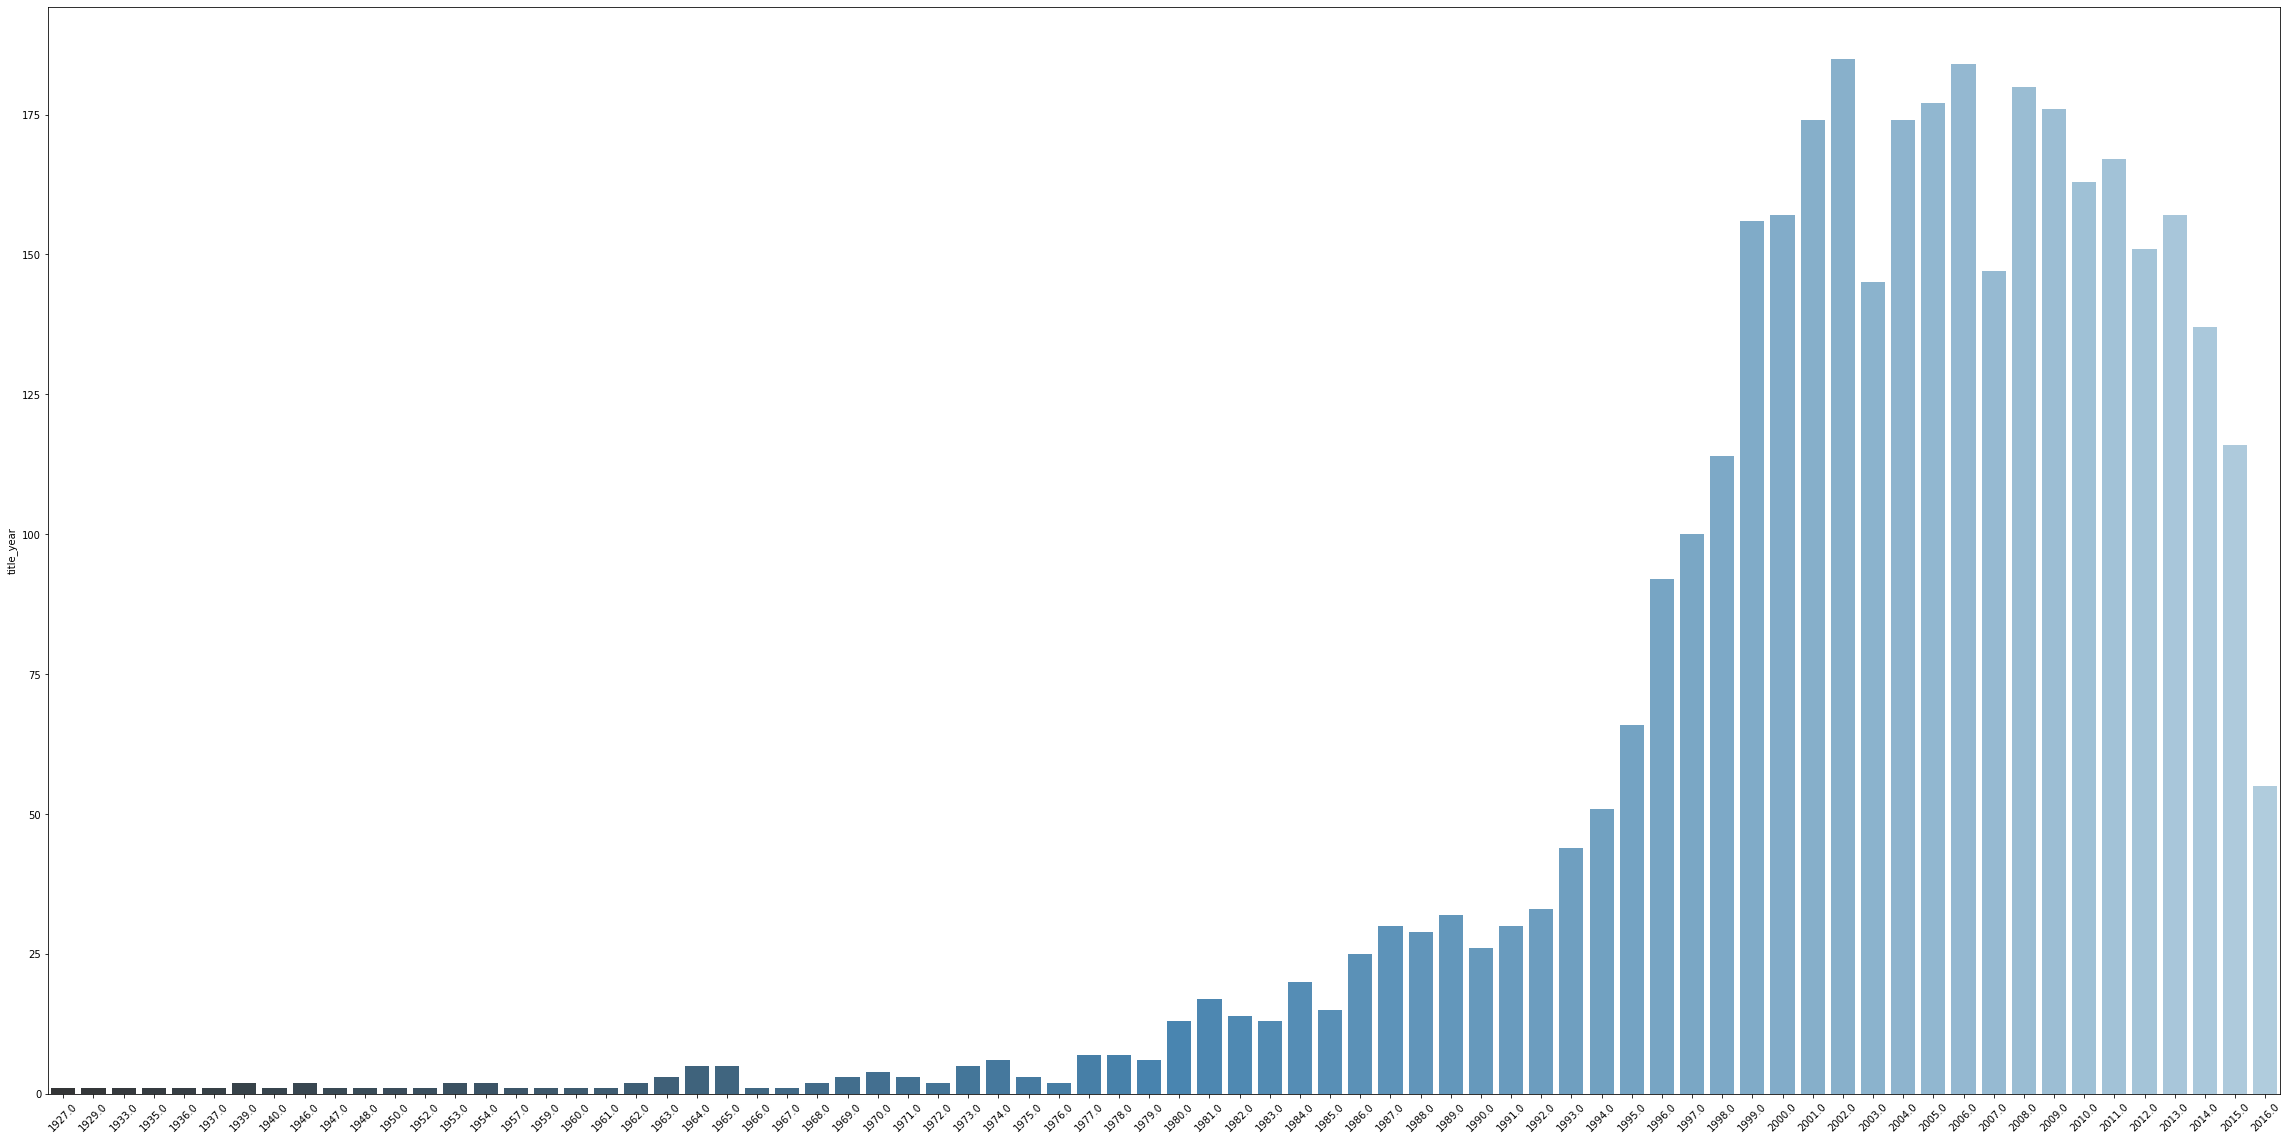

In [701]:
plt.figure(figsize=(40,20))

movie_year = sns.barplot(x=movie['title_year'].value_counts().index, y=movie['title_year'].value_counts(), 
            palette="Blues_d")
movie_year.set_xticklabels(movie_year.get_xticklabels( ), rotation=45 )
plt.show()


In [702]:
movie['title_year'].quantile([.2])

0.2    1997.0
Name: title_year, dtype: float64

## Most popular plot keywords  

In [705]:
new_df = movie[movie['plot_keywords'].notnull()]
plot_keywords = new_df['plot_keywords']
keyword_per_id = plot_keywords.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [706]:
# Extract keywords data which have over 100 frequency
keyword_over100_count = pd.DataFrame(keyword_per_id.sum()[keyword_per_id.sum()>100], columns=[ 'count'])

# Get top 100 frequent keywords
keyword_over100_count['keyword'] = keyword_over100_count.index

In [707]:
keyword_over100 = keyword_per_id.sum()[keyword_per_id.sum()>100].index.tolist()
keyword_per_id_over100 = keyword_per_id[keyword_over100]

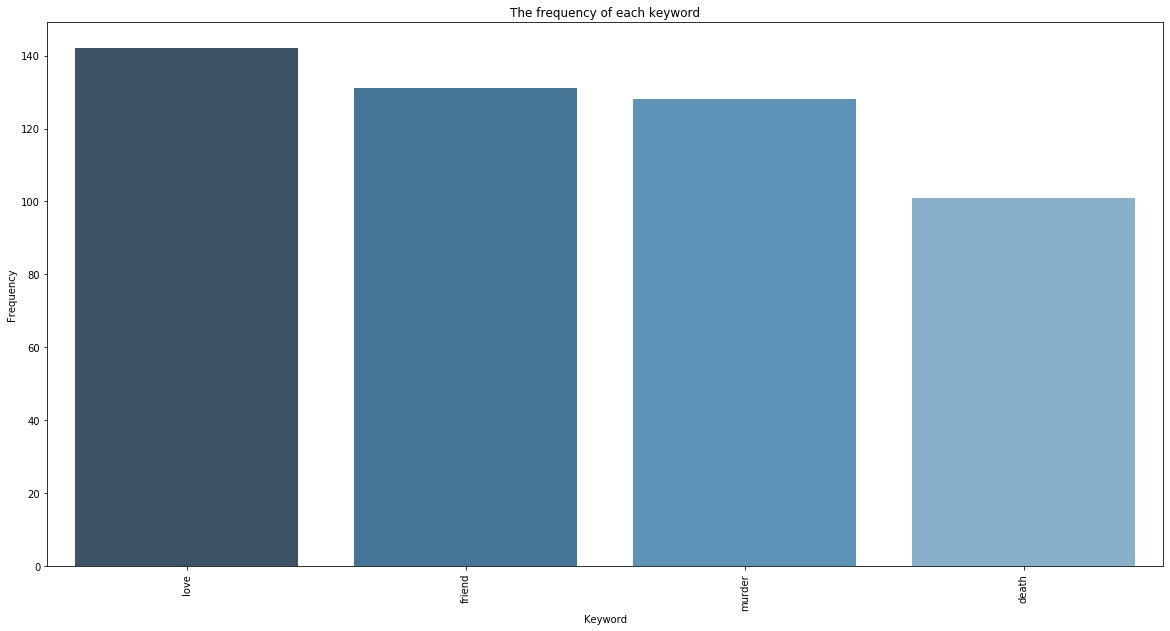

In [708]:
plt.figure(figsize=[20,10])
sns.barplot(data=keyword_over100_count.sort_values(by='count', ascending=False), x='keyword', y='count', palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('The frequency of each keyword')
plt.show()

In [709]:
# Extract keywords data which have over 50 frequency
keyword_over50_count = pd.DataFrame(keyword_per_id.sum()[keyword_per_id.sum()>50], columns=[ 'count'])

# Get top 50 frequent keywords
keyword_over50_count['keyword'] = keyword_over50_count.index

In [710]:
keyword_over50 = keyword_per_id.sum()[keyword_per_id.sum()>50].index.tolist()
keyword_per_id_over50 = keyword_per_id[keyword_over50]

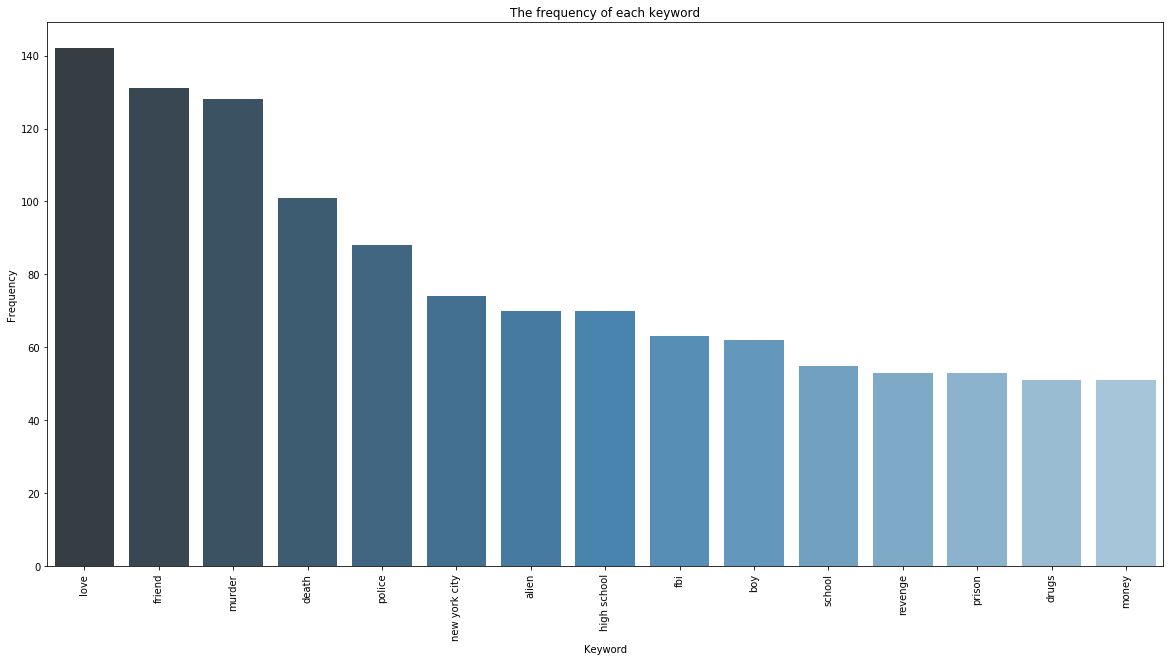

In [711]:
plt.figure(figsize=[20,10])
sns.barplot(data=keyword_over50_count.sort_values(by='count', ascending=False), x='keyword', y='count',palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('The frequency of each keyword')
plt.show()

Create popular keyword data for dfs of movie genres - top 20 films in each genre and associated key words. 

## Top 500 Movies based on ROI - plot keyword frequency

#have not done yet 

In [ ]:
# arrange and create new dataframe according to ROI 

In [718]:
ROI_heavy = movie.sort_values(by = ['ROI'], ascending=False)

In [ ]:
#following above method for genre count in top 500

In [726]:
ROI_heavy_tst = ROI_heavy[:500]
ROI_genres_per_id = ROI_heavy_tst.genres.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)
ROI_genre_count = ROI_genres_per_id.sum(axis = 0)

ROI_genre_count_df = pd.DataFrame(ROI_genre_count, columns=[ 'count'])
ROI_genre_count_df['genre'] = ROI_genre_count_df.index # Make new column with genre data
ROI_genres = list(ROI_genre_count_df.genre)
ROI_genre_count_df

ROI_genre_list = list(ROI_genre_count_df.genre)

## Revenue For top 500

In [727]:
ROI_genre_revenue_ma = np.matrix(ROI_heavy_tst.gross) * np.matrix(ROI_genres_per_id)

ROI_genre_revenue_list = ROI_genre_revenue_ma.tolist()[0]

In [728]:
ROI_genre_revenue = pd.DataFrame(
    {'genre': ROI_genres,
        'revenue': ROI_genre_revenue_list})

Text(0.5, 1.0, 'The Revenue of each genre in TMDB data')

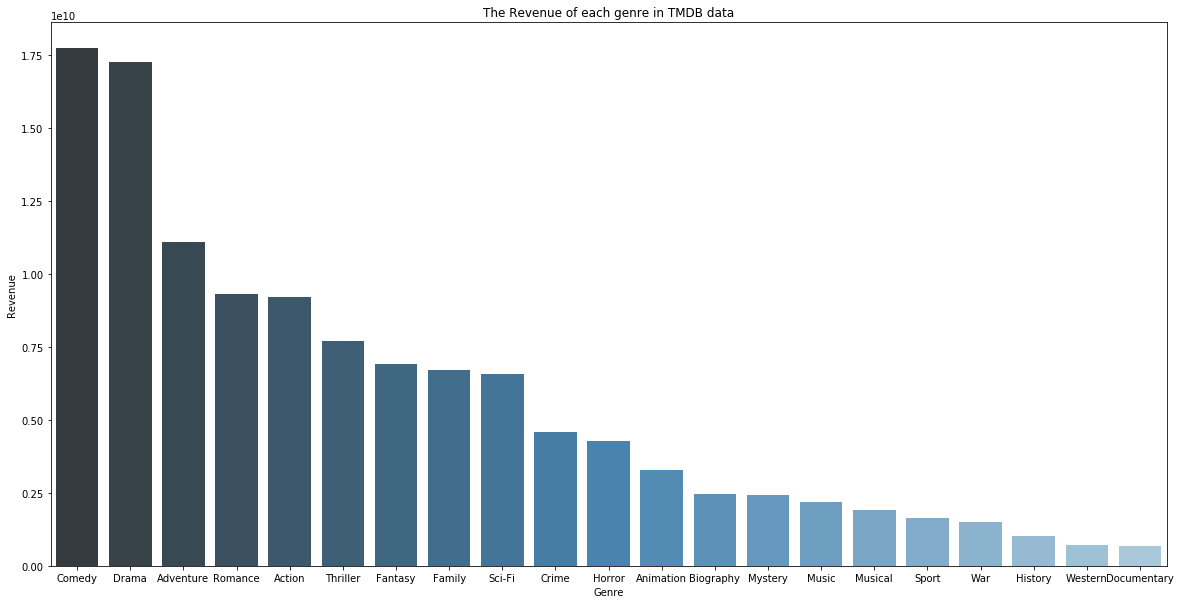

In [736]:
plt.figure(figsize=[20,10])
sns.barplot(data=ROI_genre_revenue.sort_values(by='revenue', ascending=False), x='genre', y='revenue',palette="Blues_d")
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('The Revenue of each genre in TMDB data')

In [737]:
#ROI for top 500 films based on genre 

In [729]:
ROI_genre_budget_ma = np.matrix(ROI_heavy_tst.budget) * np.matrix(ROI_genres_per_id)

In [730]:
ROI_genre_roi_list = ((ROI_genre_revenue_ma / ROI_genre_budget_ma)*100).tolist()[0]

ROI_genre_roi = pd.DataFrame(
    {'genre': ROI_genres,
        'ROI': ROI_genre_roi_list})

Text(0.5, 1.0, 'The Overall ROI of each genre in data TOP 500')

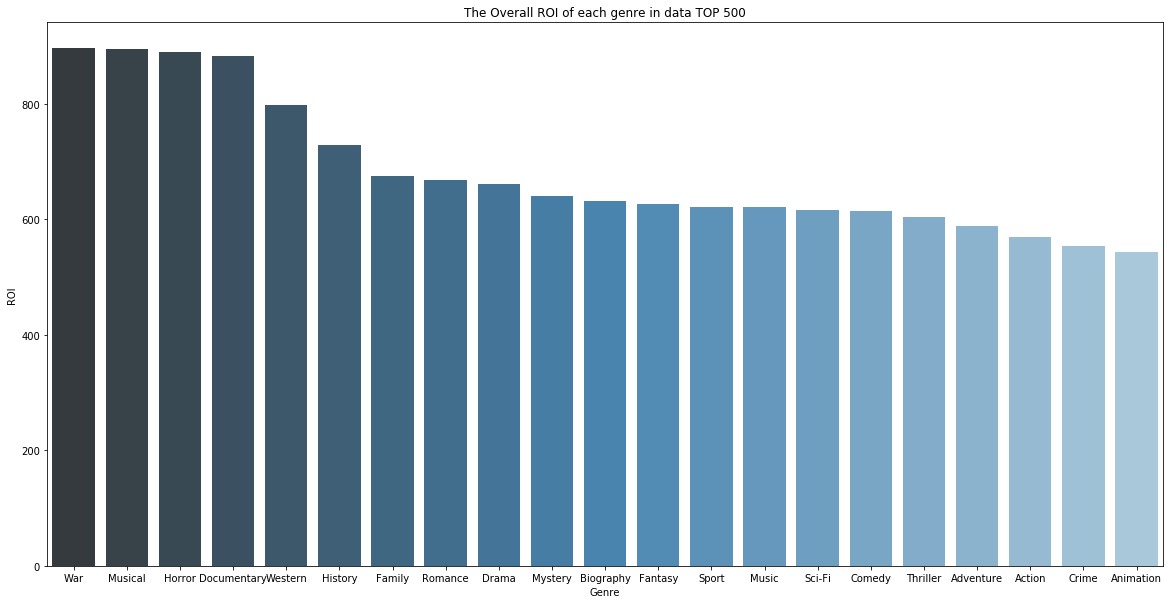

In [735]:
plt.figure(figsize=[20,10])
sns.barplot(data=ROI_genre_roi.sort_values(by='ROI', ascending=False), x='genre', y='ROI',palette="Blues_d")
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.title('The Overall ROI of each genre in data TOP 500')

In [471]:
# new_df = genre_arranged_movie[genre_arranged_movie['plot_keywords'].notnull()]
# plot_keywords = new_df['plot_keywords']
# keyword_per_id = plot_keywords.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [714]:
ROI_new_df = ROI_heavy_tst[ROI_heavy_tst['plot_keywords'].notnull()]
roi_plot_keywords = ROI_new_df['plot_keywords']
roi_keyword_per_id = roi_plot_keywords.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [473]:
# # Extract keywords data which have over 100 frequency
# keyword_over100_count = pd.DataFrame(keyword_per_id.sum()[keyword_per_id.sum()>100], columns=[ 'count'])

# # Get top 100 frequent keywords
# keyword_over100_count['keyword'] = keyword_over100_count.index

In [715]:
# Extract keywords data which have over 100 frequency
roi_keyword_over50_count = pd.DataFrame(roi_keyword_per_id.sum()[roi_keyword_per_id.sum()>50], columns=[ 'count'])

# Get top 100 frequent keywords
roi_keyword_over50_count['keyword'] = roi_keyword_over50_count.index

In [475]:
# keyword_over100 = keyword_per_id.sum()[keyword_per_id.sum()>100].index.tolist()
# keyword_per_id_over100 = keyword_per_id[keyword_over100]

In [716]:
roi_keyword_over50 = roi_keyword_per_id.sum()[roi_keyword_per_id.sum()>50].index.tolist()
roi_keyword_per_id_over50 =roi_keyword_per_id[roi_keyword_over50]

In [477]:
# plt.figure(figsize=[20,10])
# sns.barplot(data=keyword_over100_count.sort_values(by='count', ascending=False), x='keyword', y='count', palette="Blues_d")
# plt.xticks(rotation=90)
# plt.xlabel('Keyword')
# plt.ylabel('Frequency')
# plt.title('The frequency of each keyword')
# plt.show()

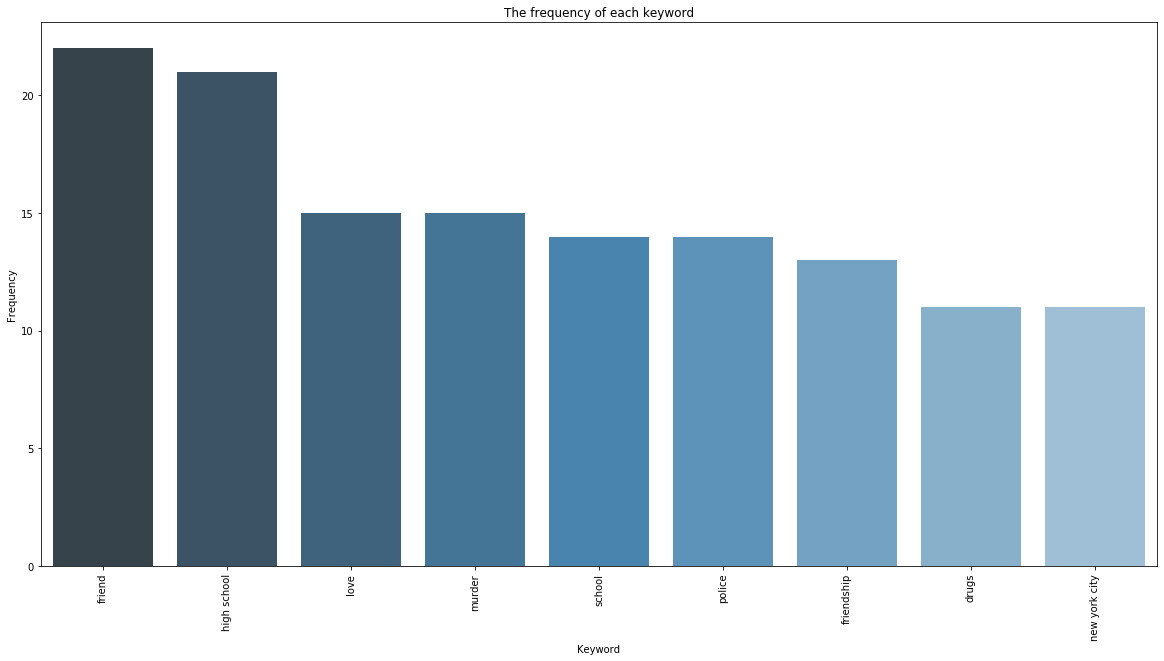

In [717]:
plt.figure(figsize=[20,10])
sns.barplot(data=roi_keyword_over10_count.sort_values(by='count', ascending=False), x='keyword', y='count', palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('The frequency of each keyword')
plt.show()

## See if there is a correlation between actors in movies and popularity/revenue

In [739]:
ROI_heavy_tst['actor_1_name'].value_counts()

Harrison Ford              9
Clint Eastwood             6
Tom Wilkinson              5
Jennifer Lawrence          5
Steve Carell               5
Robin Williams             5
Tom Cruise                 5
Bradley Cooper             4
Channing Tatum             4
Tom Hanks                  4
Jamie Lee Curtis           4
Lin Shaye                  4
Bill Murray                4
Emma Stone                 3
Jake Gyllenhaal            3
Leonard Nimoy              3
Donald Pleasence           3
Eileen Brennan             3
Morgan Freeman             3
Johnny Depp                3
Ryan Reynolds              3
Matthew Broderick          3
J.K. Simmons               3
Bruce Willis               3
Joseph Gordon-Levitt       3
Julie Benz                 2
Nia Long                   2
Bam Margera                2
Paul Walker                2
Kevin Zegers               2
                          ..
Sprague Grayden            1
Topol                      1
Yaphet Kotto               1
Robert Townsen

In [752]:
ROI_heavy_tst

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ROI
4678,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,719448.553333
4684,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754,271566.055046
4595,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,234216.856667
4858,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,English,USA,R,25000.0,1995.0,111.0,6.6,1.85,265,40986.400000
3221,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,36942.728535
4908,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,29156.000000
4831,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,English,USA,R,100000.0,2015.0,40.0,4.2,1.85,0,22757.819000
4851,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,English,USA,PG,65000.0,2004.0,0.0,7.3,1.78,0,17737.489231
2461,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,15666.666667
4565,Color,George Lucas,100.0,112.0,0.0,425.0,Ron Howard,11000.0,115000000.0,Comedy|Drama|Music,...,English,USA,PG,777000.0,1973.0,2000.0,7.5,2.35,0,14800.514801


In [753]:
#ROI_heavy_tst['Film_Genre'].value_counts()

In [741]:
ROI_heavy_tst['director_name'].value_counts()

Steven Spielberg         9
Clint Eastwood           4
James Wan                4
Spike Lee                3
Alex Kendrick            3
Chris Columbus           3
Wes Craven               3
Darren Aronofsky         3
James DeMonaco           3
Stephen Herek            3
Tim Story                3
Danny Boyle              3
Harold Ramis             3
Michael Moore            3
Terence Young            3
George Lucas             3
David O. Russell         3
Kevin Smith              3
John Carpenter           3
Jeff Tremaine            3
Guy Hamilton             3
Darren Lynn Bousman      3
F. Gary Gray             3
Leonard Nimoy            3
Malcolm D. Lee           2
Mark Waters              2
Michael Tiddes           2
Hugh Wilson              2
Rob Cohen                2
Sergio Leone             2
                        ..
Maria Maggenti           1
Todd Field               1
Stiles White             1
Yarrow Cheney            1
Josh Trank               1
Bobby Farrelly           1
N

In [742]:
action_df = item_dfs[0]
adventure_df = item_dfs[1]
animation_df = item_dfs[2]
biography_df = item_dfs[3]
comedy_df = item_dfs[4]
crime_df = item_dfs[5]
documentary_df = item_dfs[6]
drama_df = item_dfs[7]
family_df = item_dfs[8]
fantasy_df = item_dfs[9]
horror_df = genre_dfs[10]
musical_df = item_dfs[11]
mystery_df = item_dfs[12]
romance_df = item_dfs[13]
sciFi_df = item_dfs[14]
thriller_df = item_dfs[15]
western_df = item_dfs[16]

In [743]:
action_desc = action_df.describe()

In [744]:
action_desc.loc[['mean'],['ROI']]

,ROI
mean,111.186512


In [745]:
desc_df_list = []
for genre_desc_df in item_dfs:
    genre_desc_df = genre_desc_df.describe()
    genre_desc_df = genre_desc_df.loc[['mean'],['ROI']]
    desc_df_list.append(genre_desc_df)

In [746]:
desc_df_list

[             ROI
 mean  111.186512,       ROI
 mean  NaN,             ROI
 mean  65.520842,       ROI
 mean  NaN,            ROI
 mean  0.822667,       ROI
 mean  NaN,       ROI
 mean  NaN,       ROI
 mean  NaN,       ROI
 mean  NaN,              ROI
 mean  418.889766,       ROI
 mean  NaN,              ROI
 mean  554.166667,              ROI
 mean  299.166306,       ROI
 mean  NaN,       ROI
 mean  NaN,       ROI
 mean  NaN,                ROI
 mean  23847.277629,       ROI
 mean  NaN,       ROI
 mean  NaN,       ROI
 mean  NaN,               ROI
 mean  1344.911525,       ROI
 mean  NaN]

In [747]:
action_mean_ROI = desc_df_list[0]
adventure_mean_ROI = desc_df_list[1]
animation_mean_ROI = desc_df_list[2]
biography_mean_ROI = desc_df_list[3]
comedy_mean_ROI = desc_df_list[4]
crime_mean_ROI = desc_df_list[5]
documentary_mean_ROI = desc_df_list[6]
drama_mean_ROI = desc_df_list[7]
family_mean_ROI = desc_df_list[8]
fantasy_mean_ROI = desc_df_list[9]
horror_mean_ROI = desc_df_list[10]
musical_mean_ROI = desc_df_list[11]
mystery_mean_ROI = desc_df_list[12]
romance_mean_ROI = desc_df_list[13]
sciFi_mean_ROI = desc_df_list[14]
thriller_mean_ROI = desc_df_list[15]
western_mean_ROI = desc_df_list[16]

In [748]:
print("Average ROI for all movies in Dataset", '\n',
      'action' , action_mean_ROI, '\n', '\n',
      'adventure', adventure_mean_ROI , '\n','\n',
      'animation',animation_mean_ROI, '\n','\n',
      'biography', biography_mean_ROI, '\n','\n',
      'comedy', comedy_mean_ROI, '\n','\n',
      'crime', crime_mean_ROI, '\n','\n',
      'documentary', documentary_mean_ROI, '\n','\n',
      'drama', drama_mean_ROI, '\n','\n',
      'family', family_mean_ROI, '\n','\n',
      'fantasy', fantasy_mean_ROI, '\n','\n',
      'horror', horror_mean_ROI, '\n','\n',
      'musical', musical_mean_ROI, '\n','\n',
      'mystery', mystery_mean_ROI, '\n','\n',
      'romance', romance_mean_ROI, '\n','\n',
      'sciFi', sciFi_mean_ROI, '\n','\n',
      'thriller', thriller_mean_ROI, '\n','\n',
      'western', western_mean_ROI,)

Average ROI for all movies in Dataset 
 action              ROI
mean  111.186512 
 
 adventure       ROI
mean  NaN 
 
 animation             ROI
mean  65.520842 
 
 biography       ROI
mean  NaN 
 
 comedy            ROI
mean  0.822667 
 
 crime       ROI
mean  NaN 
 
 documentary       ROI
mean  NaN 
 
 drama       ROI
mean  NaN 
 
 family       ROI
mean  NaN 
 
 fantasy              ROI
mean  418.889766 
 
 horror       ROI
mean  NaN 
 
 musical              ROI
mean  554.166667 
 
 mystery              ROI
mean  299.166306 
 
 romance       ROI
mean  NaN 
 
 sciFi       ROI
mean  NaN 
 
 thriller       ROI
mean  NaN 
 
 western                ROI
mean  23847.277629


In [754]:
#ROI_genre_list = list(ROI_heavy_tst['Film_Genre'].unique())


In [755]:
# ROI_genre_dfs = []
# for genre in ROI_genre_list:
#     ROI_genre_dfs.append(ROI_heavy_tst.loc[ROI_heavy_tst['Film_Genre'] == genre])  

In [751]:
ROI_item_dfs = []
for roi_item in ROI_genre_dfs:
    roi_item = roi_item.sort_values(by = ['ROI'], ascending=False)
    ROI_item_dfs.append(roi_item)

In [558]:
ROI_item_dfs

[                                  movie_title Film_Genre  \
 4678                      Paranormal Activity     Horror   
 4595                  The Blair Witch Project     Horror   
 3221             The Texas Chain Saw Massacre     Horror   
 4831                              The Gallows     Horror   
 2461                                Halloween     Horror   
 4443                         The Devil Inside     Horror   
 4386                                      Saw     Horror   
 2215                                   Psycho     Horror   
 4616                   Kingdom of the Spiders     Horror   
 4432                               Unfriended     Horror   
 3970                    Paranormal Activity 2     Horror   
 2869                             The Exorcist     Horror   
 3628                                   Saw II     Horror   
 3976                                The Purge     Horror   
 3632                    Paranormal Activity 3     Horror   
 4436                   

In [559]:
ROI_action_df = ROI_item_dfs[0]
ROI_adventure_df = ROI_item_dfs[1]
ROI_animation_df = ROI_item_dfs[2]
ROI_biography_df = ROI_item_dfs[3]
ROI_comedy_df = ROI_item_dfs[4]
ROI_crime_df = ROI_item_dfs[5]
ROI_documentary_df = ROI_item_dfs[6]
ROI_drama_df = ROI_item_dfs[7]
ROI_family_df = ROI_item_dfs[8]
ROI_fantasy_df = ROI_item_dfs[9]
ROI_horror_df = ROI_genre_dfs[10]
ROI_musical_df = ROI_item_dfs[11]
ROI_mystery_df = ROI_item_dfs[12]
ROI_romance_df = ROI_item_dfs[13]
ROI_sciFi_df = ROI_item_dfs[14]
ROI_thriller_df = ROI_item_dfs[15]
ROI_western_df = ROI_item_dfs[16]

In [560]:
ROI_desc_df_list = []
for genre_desc_df in ROI_item_dfs:
    genre_desc_df = genre_desc_df.describe()
    genre_desc_df = genre_desc_df.loc[['mean'],['ROI']]
    ROI_desc_df_list.append(genre_desc_df)

In [561]:
Top_action_mean_ROI = ROI_desc_df_list[0]
Top_adventure_mean_ROI = ROI_desc_df_list[1]
Top_animation_mean_ROI = ROI_desc_df_list[2]
Top_biography_mean_ROI = ROI_desc_df_list[3]
Top_comedy_mean_ROI = ROI_desc_df_list[4]
Top_crime_mean_ROI = ROI_desc_df_list[5]
Top_documentary_mean_ROI = ROI_desc_df_list[6]
Top_drama_mean_ROI = ROI_desc_df_list[7]
Top_family_mean_ROI = ROI_desc_df_list[8]
Top_fantasy_mean_ROI = ROI_desc_df_list[9]
Top_horror_mean_ROI = ROI_desc_df_list[10]
Top_musical_mean_ROI = ROI_desc_df_list[11]
Top_mystery_mean_ROI = ROI_desc_df_list[12]
Top_romance_mean_ROI = ROI_desc_df_list[13]
Top_sciFi_mean_ROI = ROI_desc_df_list[14]
Top_thriller_mean_ROI = ROI_desc_df_list[15]
Top_western_mean_ROI = ROI_desc_df_list[16]

In [564]:
print("Average ROI for top 500 movies in Dataset", '\n',
      'action' , Top_action_mean_ROI, '\n', '\n',
      'adventure', Top_adventure_mean_ROI , '\n','\n',
      'animation',Top_animation_mean_ROI, '\n','\n',
      'biography', Top_biography_mean_ROI, '\n','\n',
      'comedy', Top_comedy_mean_ROI, '\n','\n',
      'crime', Top_crime_mean_ROI, '\n','\n',
      'documentary', Top_documentary_mean_ROI, '\n','\n',
      'drama', Top_drama_mean_ROI, '\n','\n',
      'family', Top_family_mean_ROI, '\n','\n',
      'fantasy', Top_fantasy_mean_ROI, '\n','\n',
      'horror', Top_horror_mean_ROI, '\n','\n',
      'musical', Top_musical_mean_ROI, '\n','\n',
      'mystery', Top_mystery_mean_ROI, '\n','\n',
      'romance', Top_romance_mean_ROI, '\n','\n',
      'sciFi', Top_sciFi_mean_ROI, '\n','\n',
      'thriller', Top_thriller_mean_ROI, '\n','\n',
      'western', Top_western_mean_ROI,)

Average ROI for top 500 movies in Dataset 
 action                ROI
mean  23706.021676 
 
 adventure               ROI
mean  10096.07715 
 
 animation               ROI
mean  1534.283618 
 biography              ROI
mean  1182.18961 
 comedy               ROI
mean  1422.003639 
 crime               ROI
mean  2857.250185 
 documentary               ROI
mean  1058.273425 
 drama              ROI
mean  2290.74791 
 family             ROI
mean  4142.3758 
 fantasy               ROI
mean  1195.540296 
 horror               ROI
mean  1127.533876 
 musical               ROI
mean  1881.781882 
 mystery               ROI
mean  1001.014286 
 romance              ROI
mean  750.272889 
 sciFi              ROI
mean  640.297778 
 thriller              ROI
mean  663.066667 
 western              ROI
mean  509.213333
